In [1]:
import math 
import itertools 
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt 

In [12]:
M = 10 # number of simulations 
t = 10 # time 

In [13]:
random_walk = [-1,1] # defines the list that goes -1 or 1 
steps = np.random.choice(random_walk, size = (M, t)).T # takes the increment (random_walk), then determines the number of simulations and the time period used.
origin = np.zeros((1,M)) # takes the place started at zeros and tracks the starting spot and how far we are away
rw_paths = np.concatenate([origin, steps]).cumsum(axis = 0) # this combines the origins and steps, the sums it on the 0 axis

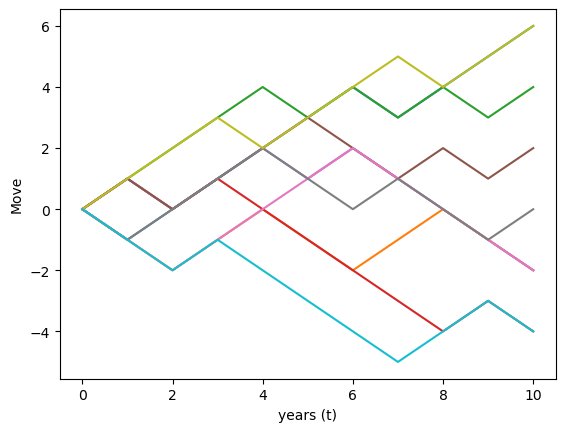

[ 27. -11.  31. -15.   5.  15.  -3.   3.  35. -29.]


0.5272727272727272

In [14]:
plt.plot(rw_paths) #Prints the paths 
plt.xlabel("years (t)") #labels X axis 
plt.ylabel("Move") #labels Y axis 
plt.show()

print(sum(rw_paths))
np.average(rw_paths)

In [11]:
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis =0 ),3 )

[quadratic_variation(path) for path in rw_paths[:4]]

[0.0, 20.0, 64.0, 64.0]

In [15]:
#10,000,000 simulations 

[variance(path) for path in rw_paths[1:11]]


[1.0, 1.96, 1.96, 2.56, 4.0, 7.4, 7.84, 8.04, 8.04, 13.44]

Scaled Symmetric Random Walk 


In [16]:
M = 10 # Number of simulations
t = 10 # time 
n = 10 

In [18]:
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size = (M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis = 0)

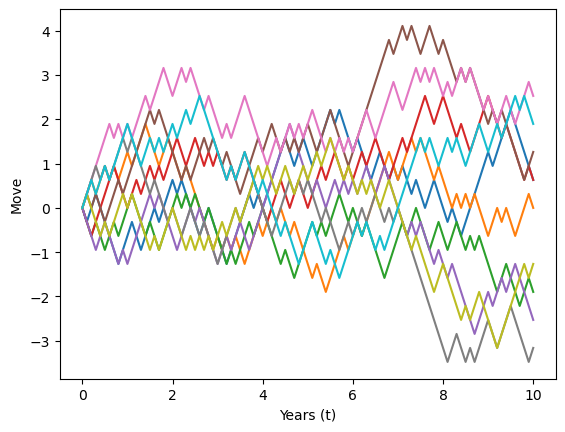

In [19]:
time = np.linspace(0,t,t*n+1)
tt = np.full(shape = (M, t*n+1), fill_value= time)
tt = tt.T 

# print(np.size(tt),np.size(srw_paths))

plt.plot(tt, srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

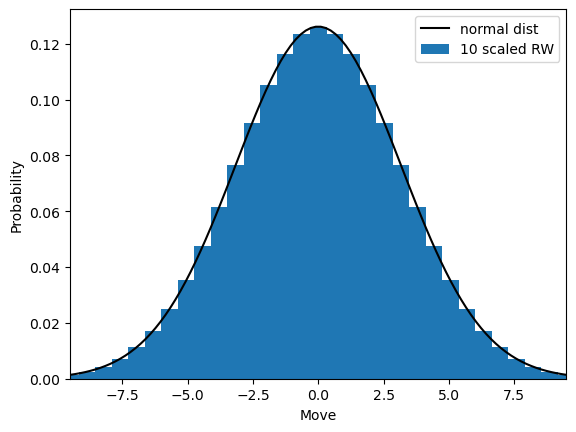

In [24]:
n = 10 # the higher this number is the more it is scaled to the normal distrubtion and smooth 
t = 10 

#combinations 

def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k) * (0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms], outcomes[1] - outcomes[0], 
        label = "{0} scaled RW".format(n))

x = np.linspace(-3*np.sqrt(t), 3 *np.sqrt(t),100)
plt.plot(x, stats.norm.pdf(x,0,np.sqrt(t)), "k-", label = "normal dist")


plt.xlim(-3*np.sqrt(t), 3* np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

<h2> Brownian Motion <h2>

<p><h4>
A brownian Motion is a stochastic process 

<h3>W:[0,T] * Ω --> R<h3>

1. W0 = 0
2. W has independant increments 
3. W has Guassian (Normal) increments 
4. W has continous sample paths (Almost Surely)

Wt ~ N(0,t)
<h4>
<p>

In [26]:
# Paramaters 

M = 10 # number of simulations 
t = 10 #time
n = 100 # steps we want to see
dt = t/n # time step

In [27]:
steps = np.random.normal(0, np.sqrt(dt), size =(M,n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis = 0)

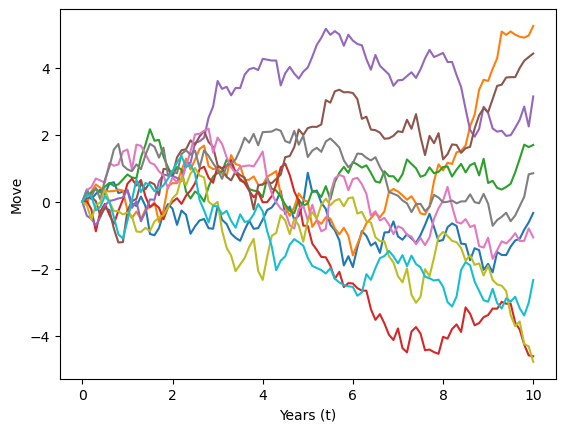

In [28]:
time = np.linspace(0, t, n+1)
tt = np.full(shape=(M, n+1), fill_value= time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [29]:
# 1,000,000 time steps 

[quadratic_variation(path) for path in bm_paths.T[:4]]

[11.26, 9.884, 6.916, 9.414]

In [30]:
# 100,000 simulations 
[variance(path) for path in bm_paths[1:11]]


[0.054, 0.103, 0.245, 0.127, 0.074, 0.243, 0.526, 0.708, 0.668, 0.412]